# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

### Load files

In [12]:
bcast_files = {
    "Default": "../results/bcast_default.csv",
    "Chain": "../results/bcast_algo2_all.csv",
    "Basic Linear": "../results/bcast_algo1.csv",
    "Pipeline": "../results/bcast_algo3.csv",
    "Binomial": "../results/bcast_algo6.csv"
}

reduce_files = {
    "Default": "../results/reduce_default.csv",
    "Linear": "../results/reduce_algo1.csv",
    "Binary": "../results/reduce_algo4_all.csv",
    "Binomial": "../results/reduce_algo5.csv",
    "Rabenseifner": "../results/reduce_algo7.csv"
}


## Broadcast

The three algorithms:
- basic_linear (1),
- pipeline (3),
- binomial (6).

In [8]:
bcast_dfs = []
for algo_name, path in bcast_files.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        df["Algorithm"] = algo_name
        bcast_dfs.append(df)

bcast_df = pd.concat(bcast_dfs, ignore_index=True)
bcast_df["Latency(us)"] = pd.to_numeric(bcast_df["Latency(us)"], errors="coerce")
bcast_df = bcast_df.dropna()
bcast_df = bcast_df.sort_values(by=["Processes", "Size", "Algorithm"])

#### Latency vs Processes for fixed message sizes (e.g. 1024, 16384, 1048576)

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

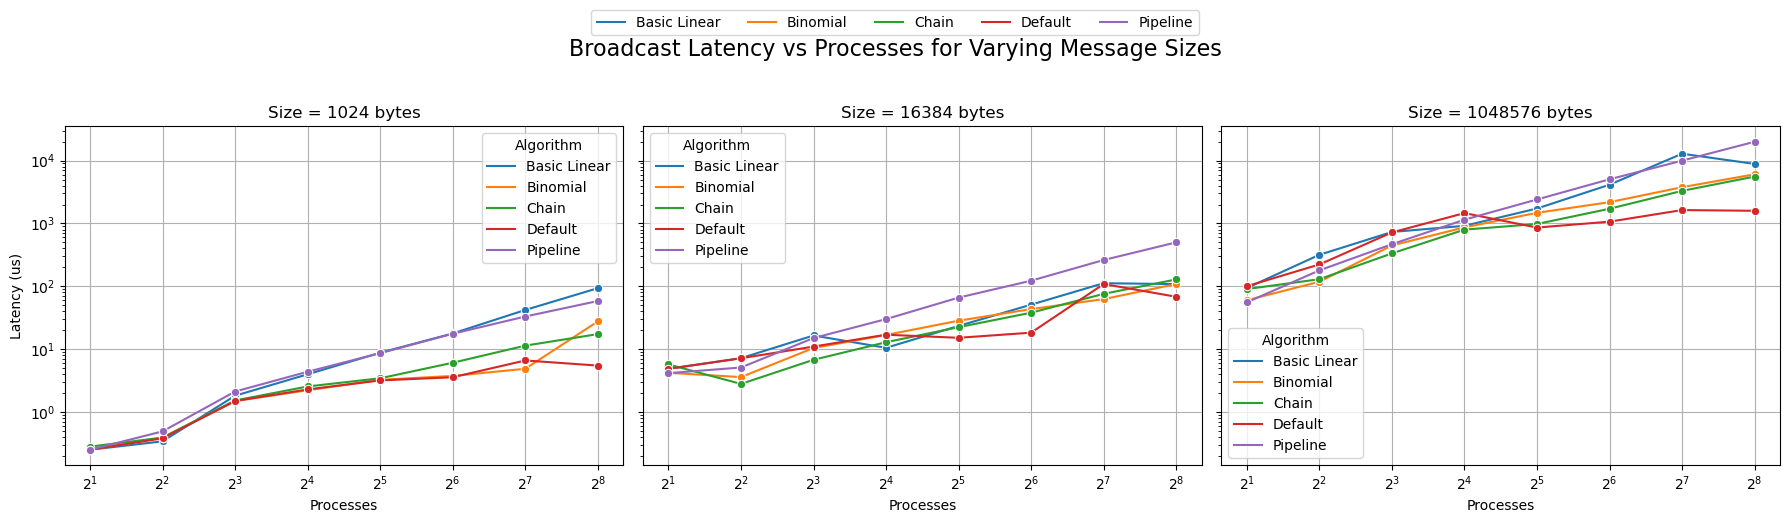

In [9]:
fixed_sizes = [1024, 16384, 1048576]  # 1 KB, 16 KB, 1 MB

# Set up the figure with 3 horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, size in enumerate(fixed_sizes):
    ax = axes[idx]
    subset = bcast_df[bcast_df["Size"] == size]
    
    sns.lineplot(data=subset,
                 x="Processes", y="Latency(us)", hue="Algorithm", marker="o", ax=ax)
    
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Size = {size} bytes")
    ax.set_xlabel("Processes")
    if idx == 0:
        ax.set_ylabel("Latency (us)")
    else:
        ax.set_ylabel("")
    ax.grid(True)

# Add global legend and title
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=len(labels))
plt.suptitle("Broadcast Latency vs Processes for Varying Message Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Latency vs Message Size, fixed process

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


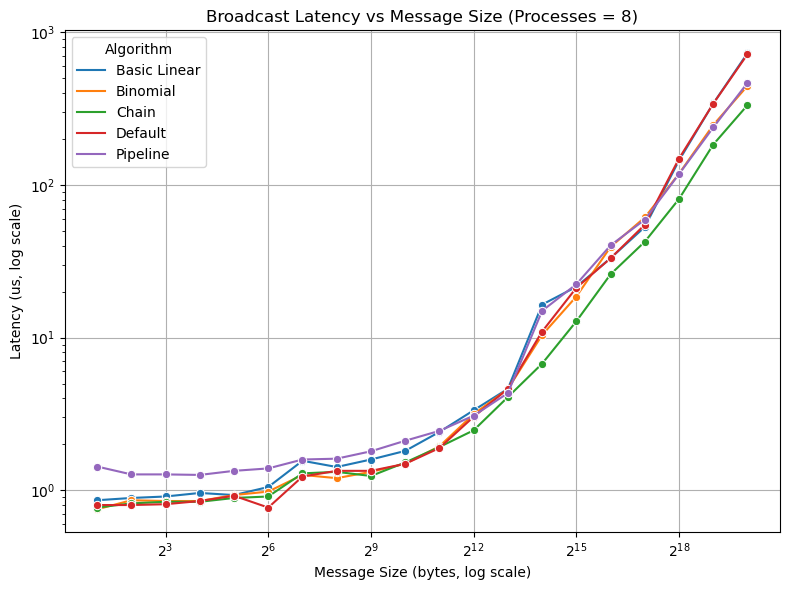

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


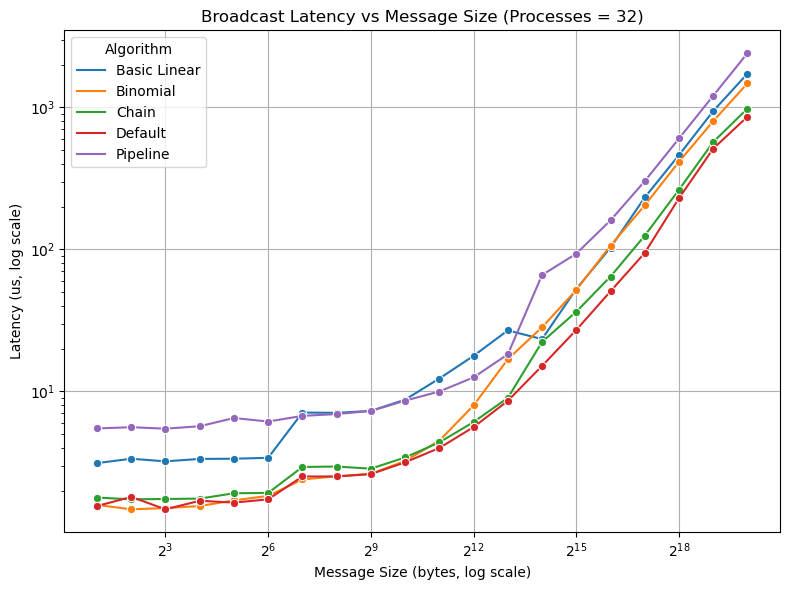

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


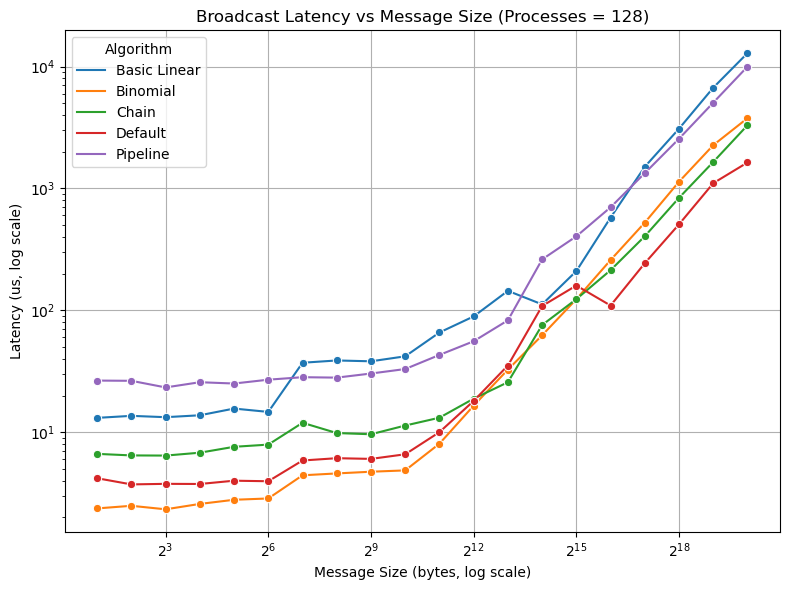

In [10]:
fixed_processes = [8, 32, 128]

# Create individual plots for each process count
for proc in fixed_processes:
    fig, ax = plt.subplots(figsize=(8, 6))
    subset = bcast_df[bcast_df["Processes"] == proc]
    sns.lineplot(data=subset, x="Size", y="Latency(us)", hue="Algorithm", marker="o", ax=ax)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Broadcast Latency vs Message Size (Processes = {proc})")
    ax.set_xlabel("Message Size (bytes, log scale)")
    ax.set_ylabel("Latency (us, log scale)")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

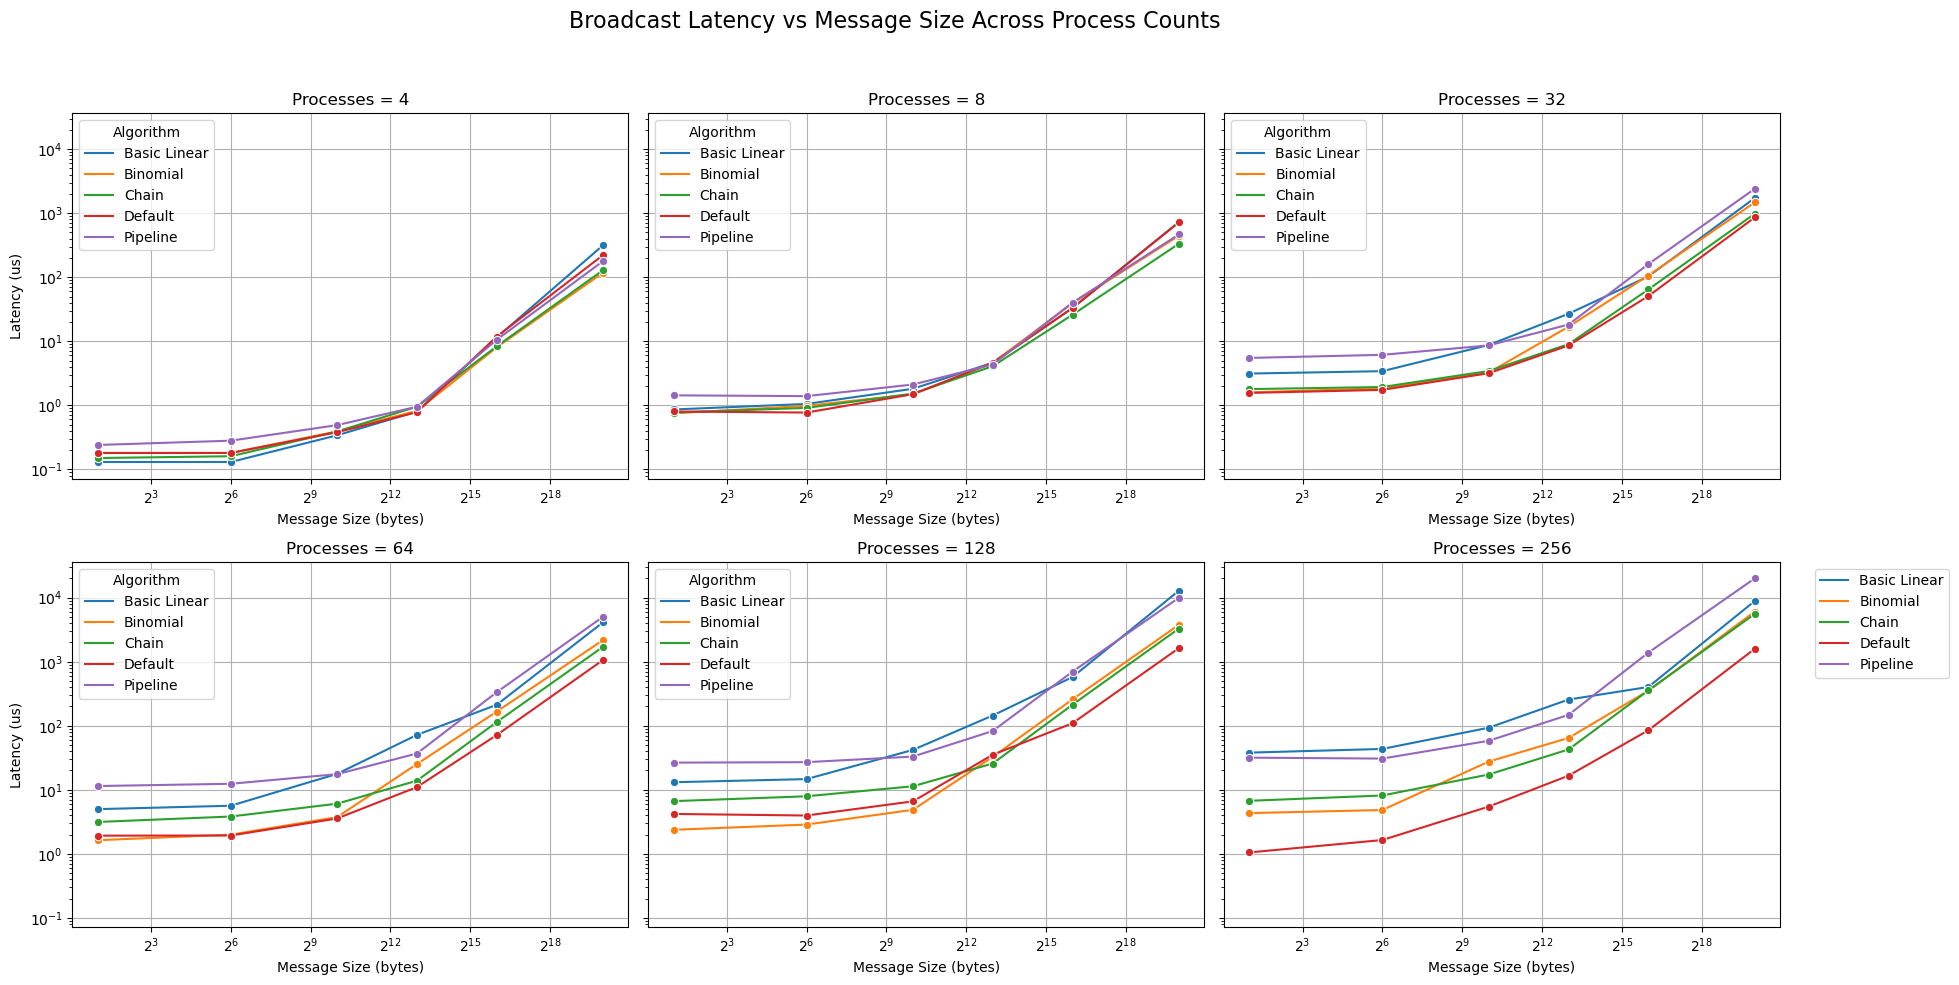

In [11]:
selected_msg_sizes = [2, 64, 1024, 8192, 65536, 1048576]

selected_proc_counts = [4, 8, 32, 64, 128, 256]

filtered_df = bcast_df[
    bcast_df["Processes"].isin(selected_proc_counts) &
    bcast_df["Size"].isin(selected_msg_sizes)
].copy()

# Optional: sort to ensure consistent plotting
filtered_df.sort_values(by=["Processes", "Size", "Algorithm"], inplace=True)

# Set up the grid
n_cols = 3
n_rows = int(np.ceil(len(selected_proc_counts) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10), sharey=True)

# Flatten axes for easier indexing
axes = axes.flatten()

for idx, proc in enumerate(selected_proc_counts):
    ax = axes[idx]
    subset = filtered_df[filtered_df["Processes"] == proc]
    sns.lineplot(data=subset, x="Size", y="Latency(us)", hue="Algorithm",
                 marker="o", ax=ax)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Processes = {proc}")
    ax.set_xlabel("Message Size (bytes)")
    if idx % n_cols == 0:
        ax.set_ylabel("Latency (us)")
    else:
        ax.set_ylabel("")
    ax.grid(True)

# Remove unused axes
for j in range(len(selected_proc_counts), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Broadcast Latency vs Message Size Across Process Counts", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Reduce

In [13]:
reduce_dfs = []
for algo_name, path in reduce_files.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        df["Algorithm"] = algo_name
        reduce_dfs.append(df)

reduce_df = pd.concat(reduce_dfs, ignore_index=True)
reduce_df["Latency(us)"] = pd.to_numeric(reduce_df["Latency(us)"], errors="coerce")
reduce_df = reduce_df.dropna()
reduce_df = reduce_df.sort_values(by=["Processes", "Size", "Algorithm"])

#### Latency vs Processes for fixed message sizes (e.g. 1024, 16384, 1048576)

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

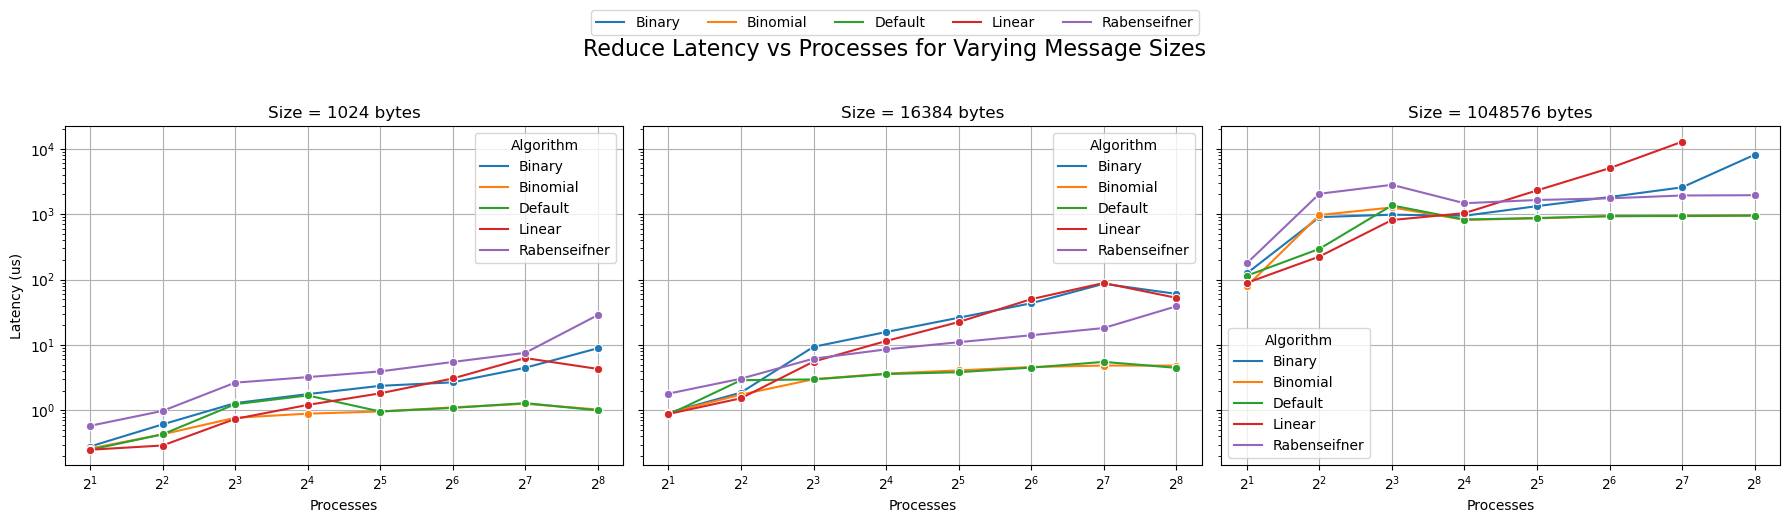

In [14]:
fixed_sizes = [1024, 16384, 1048576]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, size in enumerate(fixed_sizes):
    ax = axes[idx]
    subset = reduce_df[reduce_df["Size"] == size]
    
    sns.lineplot(data=subset, x="Processes", y="Latency(us)", hue="Algorithm",
                 marker="o", ax=ax)
    
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Size = {size} bytes")
    ax.set_xlabel("Processes")
    if idx == 0:
        ax.set_ylabel("Latency (us)")
    else:
        ax.set_ylabel("")
    ax.grid(True)

# Adjust layout and add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=len(labels))
plt.suptitle("Reduce Latency vs Processes for Varying Message Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Latency vs Message Size for fixed Process counts 

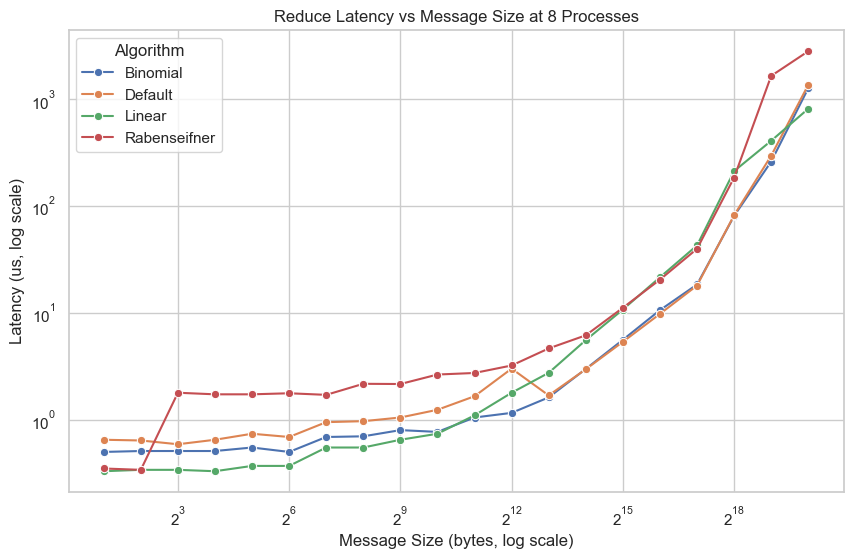

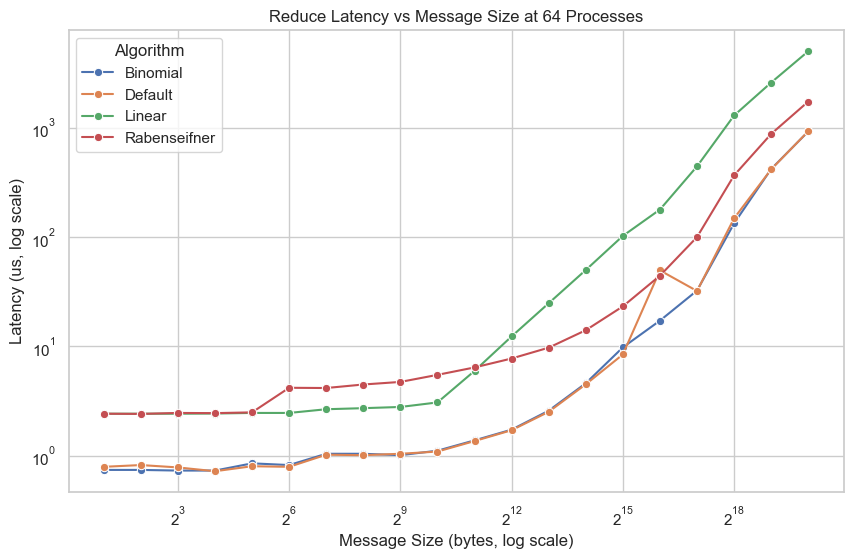

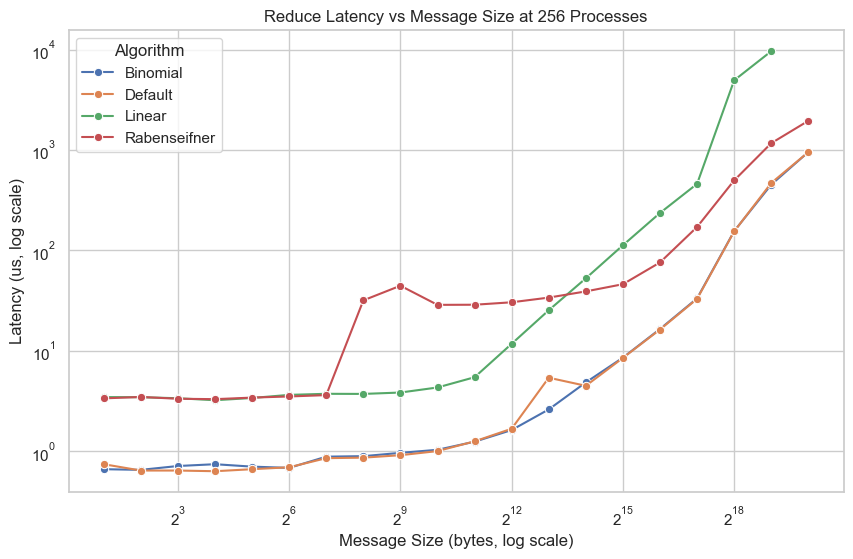

In [12]:
fixed_procs = [8, 64, 256]
figures = []

for p in fixed_procs:
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = reduce_df[reduce_df["Processes"] == p]
    sns.lineplot(data=subset, x="Size", y="Latency(us)", hue="Algorithm", marker="o", ax=ax)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Reduce Latency vs Message Size at {p} Processes")
    ax.set_xlabel("Message Size (bytes, log scale)")
    ax.set_ylabel("Latency (us, log scale)")
    ax.grid(True)
    figures.append(fig)

c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

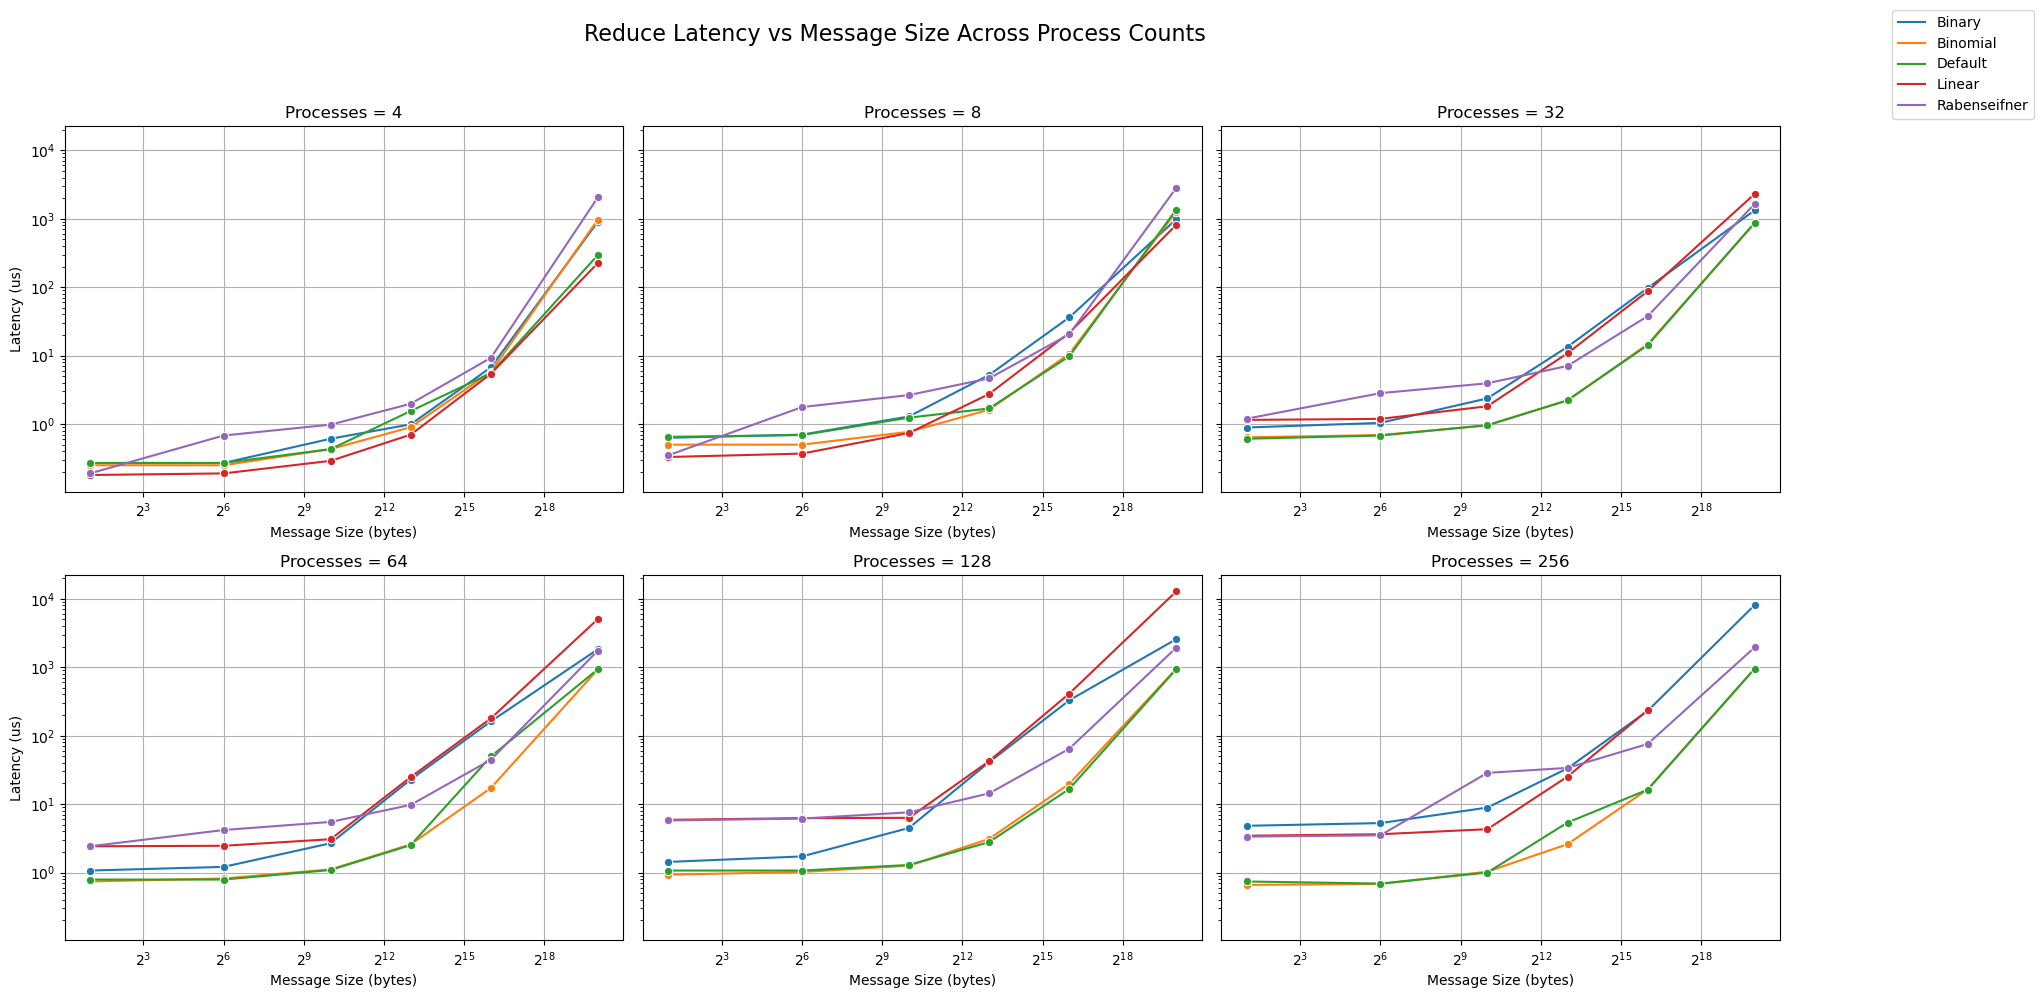

In [15]:

filtered_reduce = reduce_df[
    reduce_df["Processes"].isin(selected_proc_counts) &
    reduce_df["Size"].isin(selected_msg_sizes)
].copy()

# Sort for consistent plotting
filtered_reduce.sort_values(by=["Processes", "Size", "Algorithm"], inplace=True)

# Set up the grid
n_cols = 3
n_rows = int(np.ceil(len(selected_proc_counts) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10), sharey=True)

# Flatten axes for easier indexing
axes = axes.flatten()

for idx, proc in enumerate(selected_proc_counts):
    ax = axes[idx]
    subset = filtered_reduce[filtered_reduce["Processes"] == proc]
    sns.lineplot(data=subset, x="Size", y="Latency(us)", hue="Algorithm",
                 marker="o", ax=ax)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_title(f"Processes = {proc}")
    ax.set_xlabel("Message Size (bytes)")
    if idx % n_cols == 0:
        ax.set_ylabel("Latency (us)")
    else:
        ax.set_ylabel("")
    ax.grid(True)

# Remove unused axes
for j in range(len(selected_proc_counts), len(axes)):
    fig.delaxes(axes[j])

# Global title and layout
plt.suptitle("Reduce Latency vs Message Size Across Process Counts", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Optional: show one global legend outside the grid
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in axes:
    ax.get_legend().remove()

plt.show()
